In [1]:
import os
import pandas as pd
from getCitation import get_doi, get_citation
from getConvertedImages import convert_pdf_to_images
from DECIMERmodules import getPredictedSegments
from getDisplayMols import get_display
from ipydatagrid import Expr, DataGrid, TextRenderer, BarRenderer

2024-02-21 14:17:35.844130: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-21 14:17:35.888663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 14:17:36.542076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-21 14:17:37.354651: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-21 14:17:37.354730: I tensorflow/compiler/xla/stream_executor/cuda/

Instructions for updating:
Use fn_output_signature instead
/home/kohulan/.data/DECIMER-V2/DECIMER_model


In [2]:
filename = "m27780455.pdf"

In [3]:
image_paths = convert_pdf_to_images(filename)

In [4]:
All_Predictions = []
my_dict = {}
for i in range(len(image_paths)):
    Predictions = getPredictedSegments(image_paths[i])
    if (Predictions != "No segments") and (len(Predictions) < 302):
        my_dict[os.path.split(image_paths[i])[1]] = Predictions
        All_Predictions.append(Predictions)

2024-02-21 14:18:14.314806: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -45 } dim { size: 256 } dim { size: 256 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } int_val: 7 } } device { type: "CPU" vendor: "GenuineIntel" model: "101" frequency: 2100 num_cores: 80 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 1048576 l3_cache_size: 28835840 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape {

In [8]:
import json

# File path to save the dictionary
file_path = "m27780455.json"

# Writing the dictionary to the file
with open(file_path, "w") as f:
    json.dump(my_dict, f)

print("Dictionary saved successfully to", file_path)

Dictionary saved successfully to m27780455.json


m27780455._1.png
m27780455._1_0.png


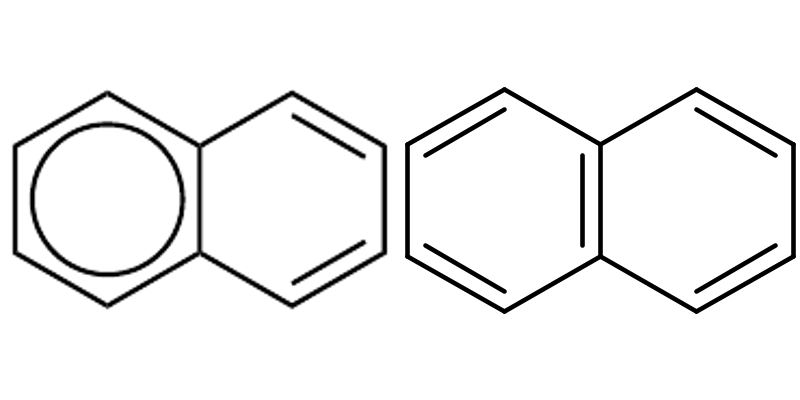

m27780455._1_1.png


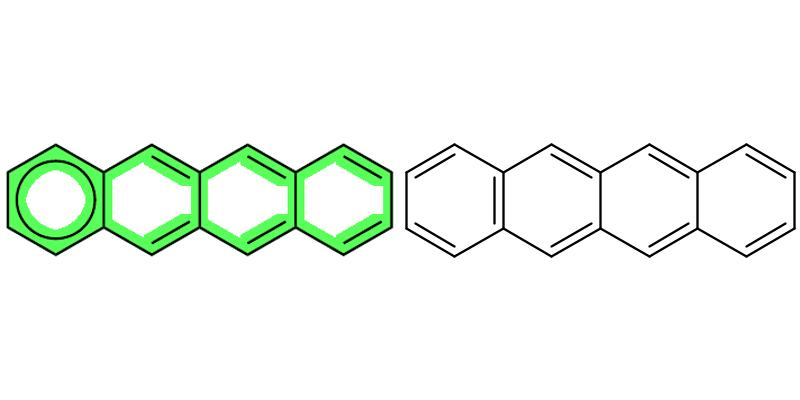

m27780455._1_2.png


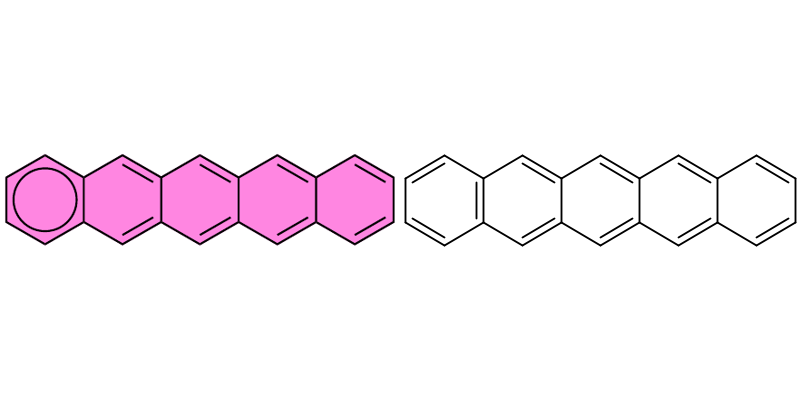

m27780455._1_3.png


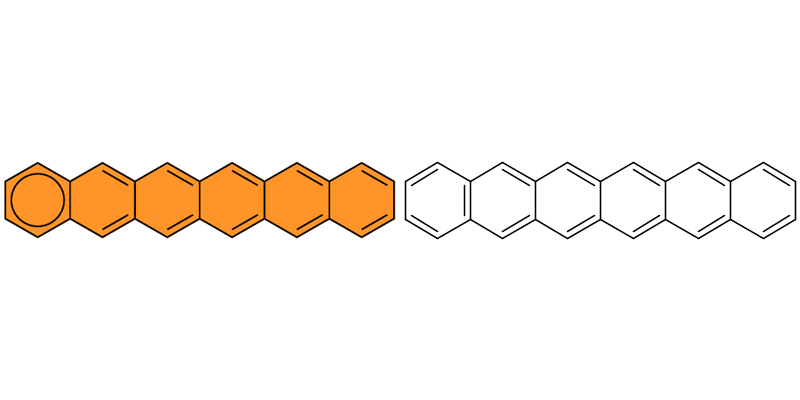

m27780455._1_4.png


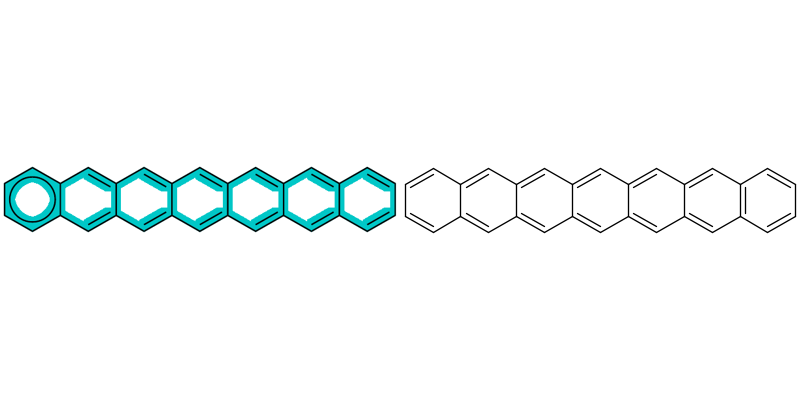

m27780455._1_5.png


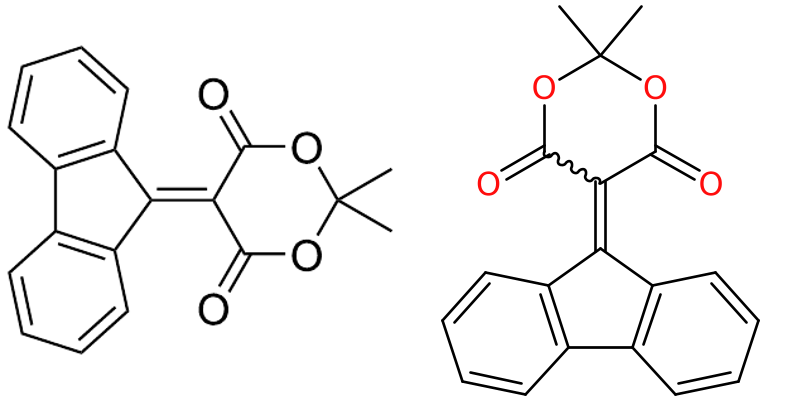

m27780455._1_6.png


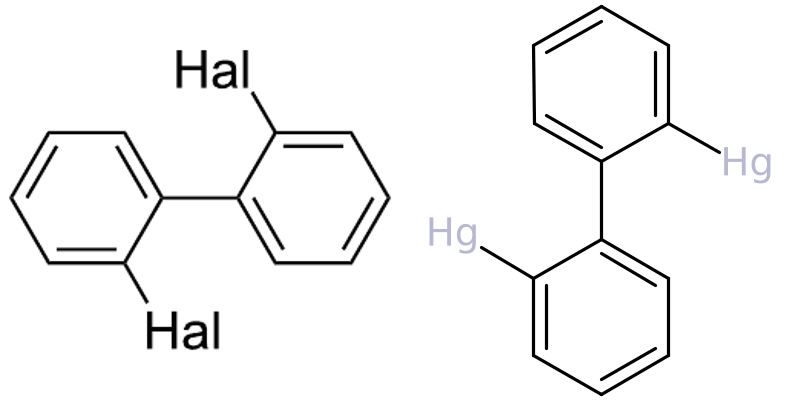

m27780455._1_7.png


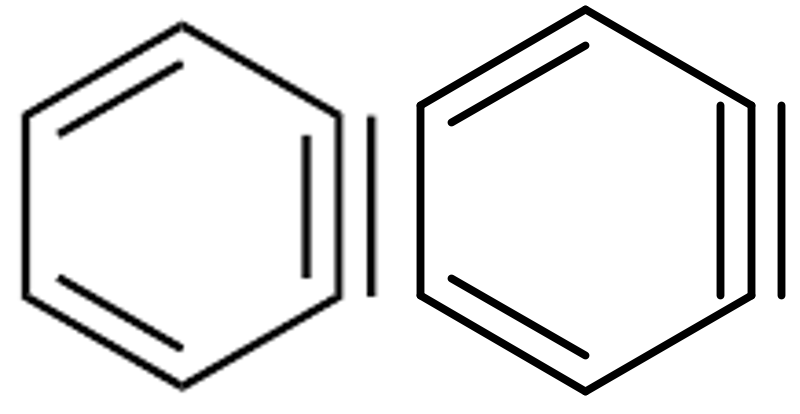

m27780455._1_8.png


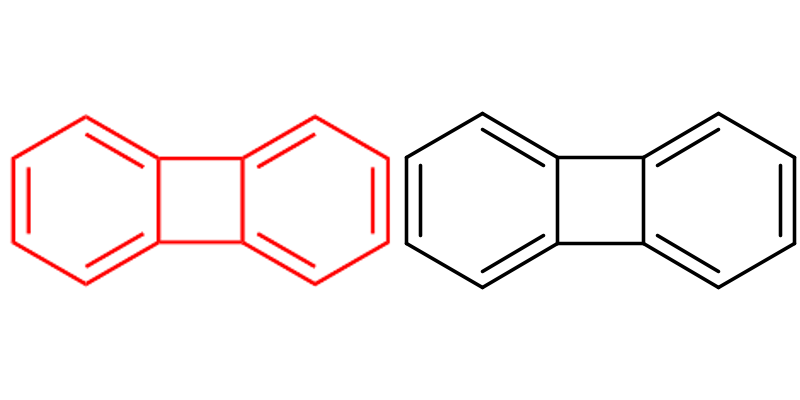

m27780455._1_9.png


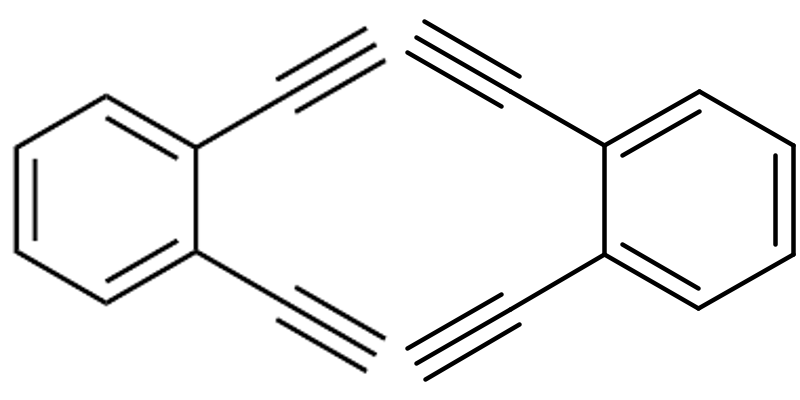

m27780455._10.png
m27780455._10_0.png


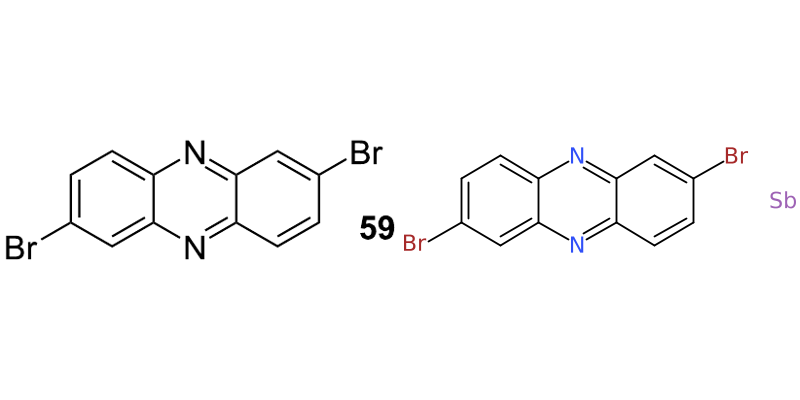

m27780455._10_1.png


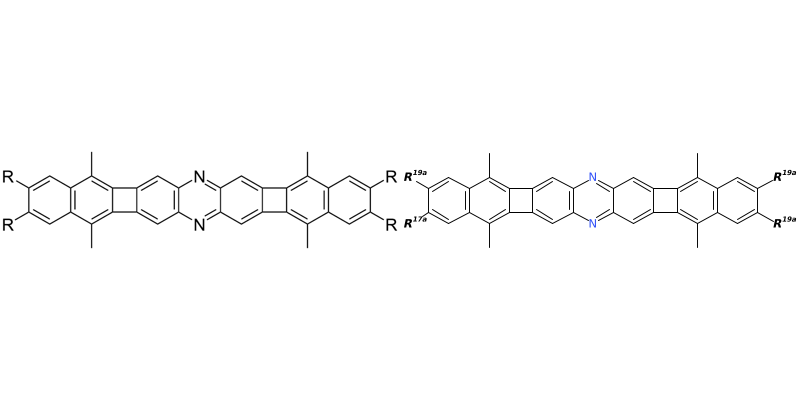

m27780455._10_2.png


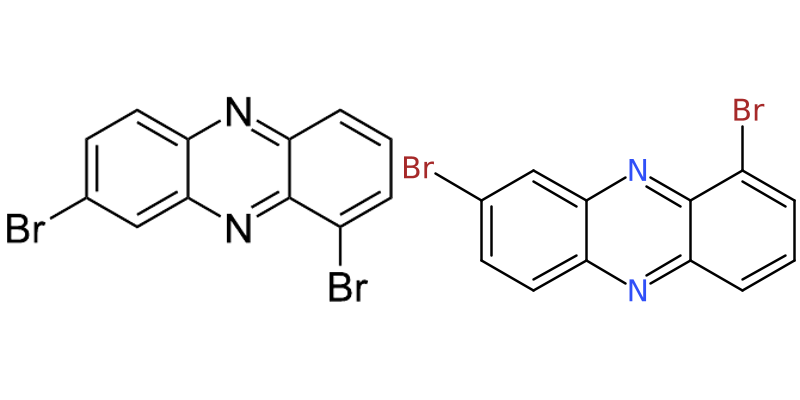

m27780455._10_3.png


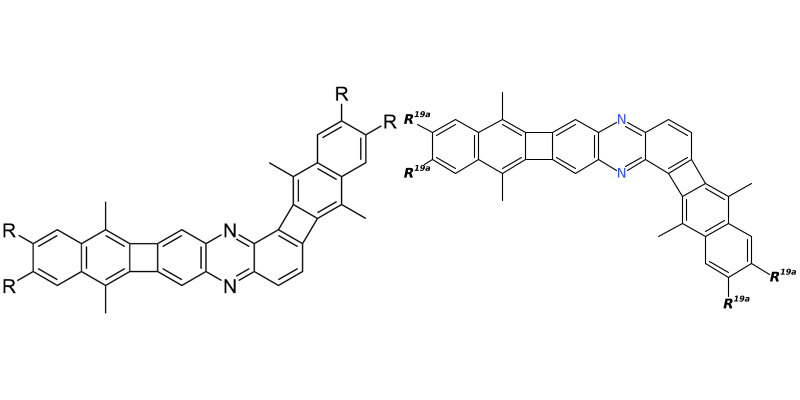

m27780455._10_4.png


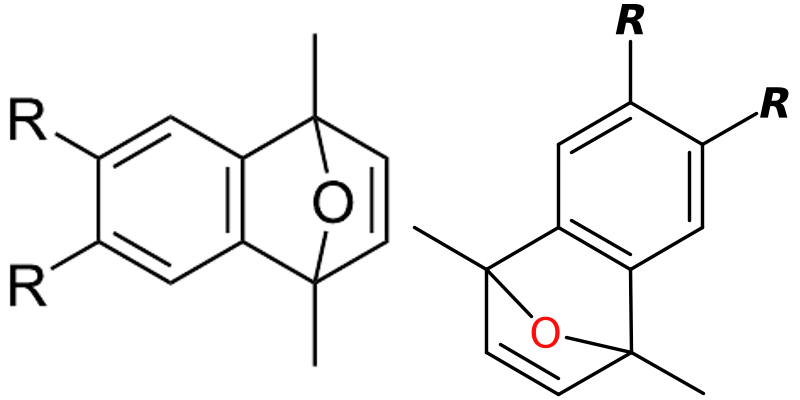

m27780455._10_5.png


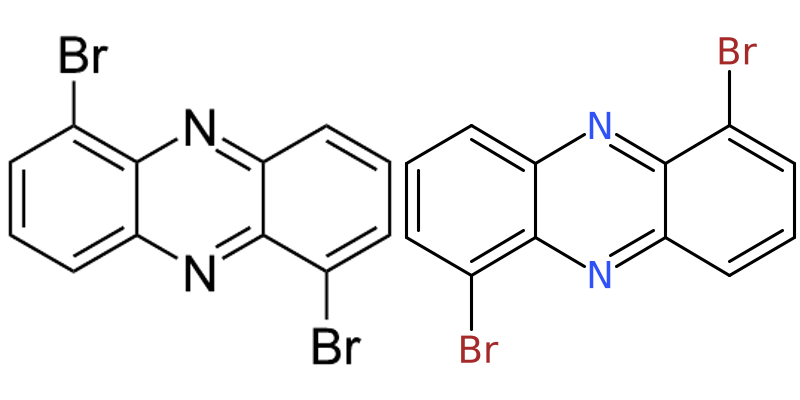

m27780455._10_6.png


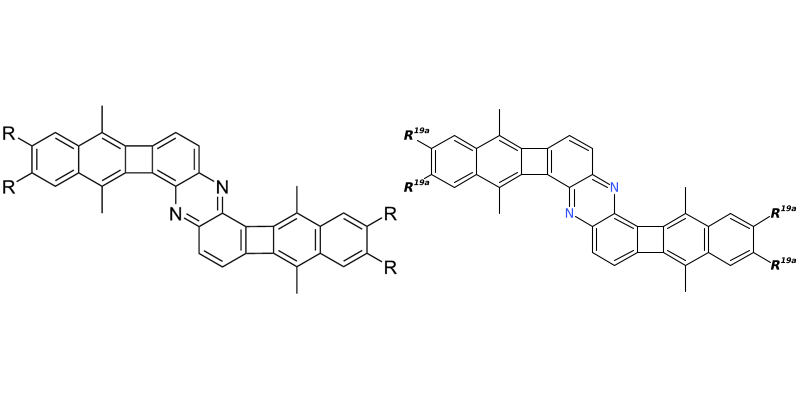

m27780455._11.png
m27780455._11_0.png


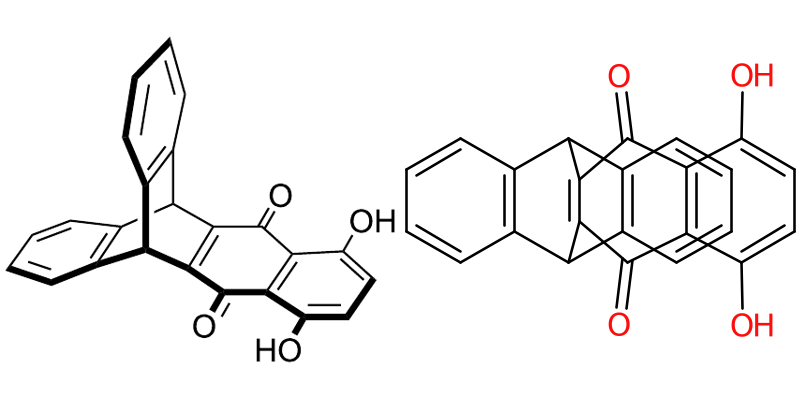

m27780455._11_1.png


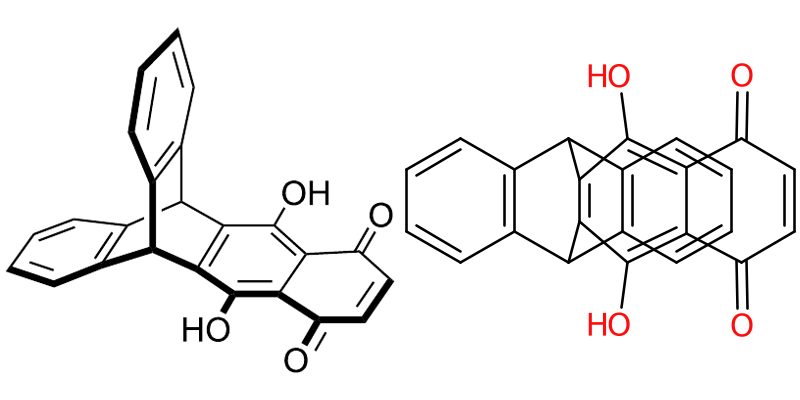

m27780455._11_2.png


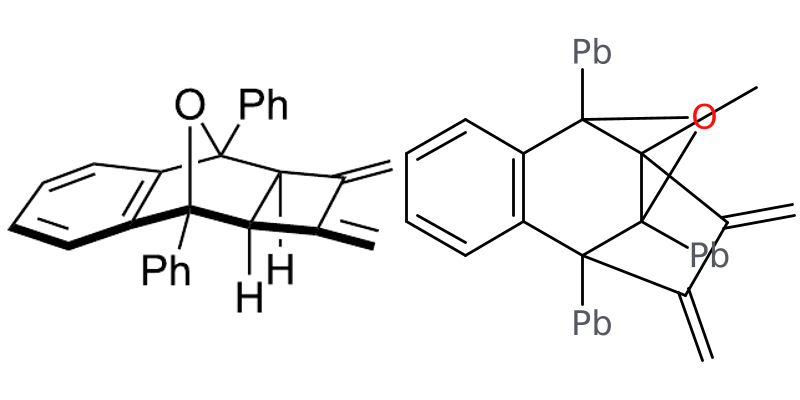

m27780455._11_3.png


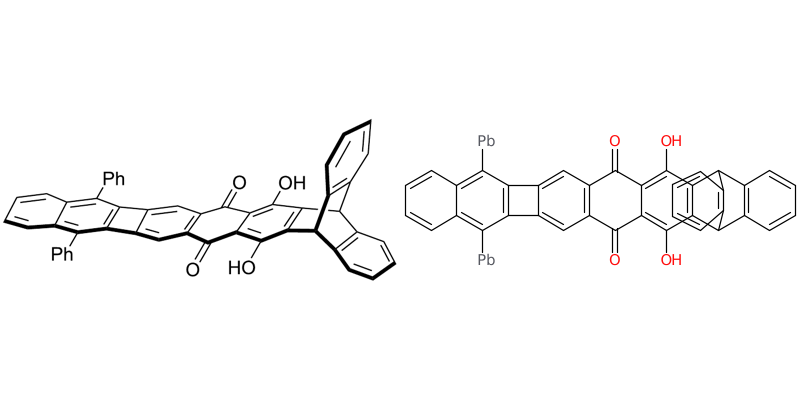

m27780455._11_4.png


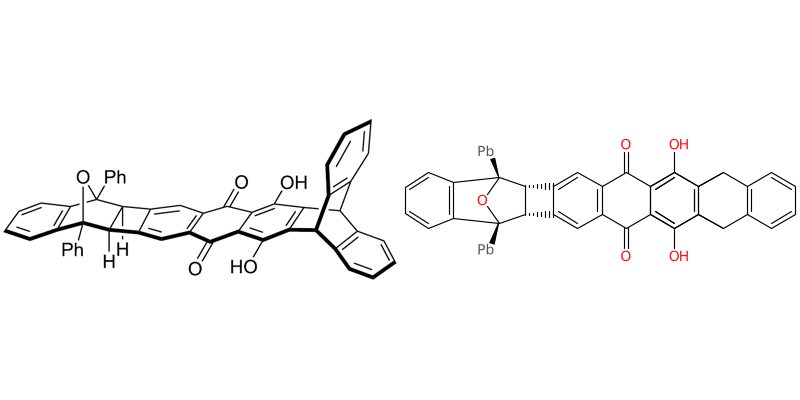

m27780455._11_5.png


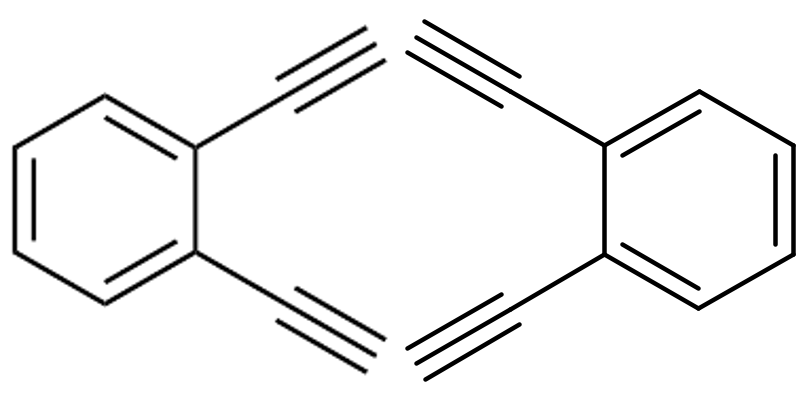

m27780455._11_6.png


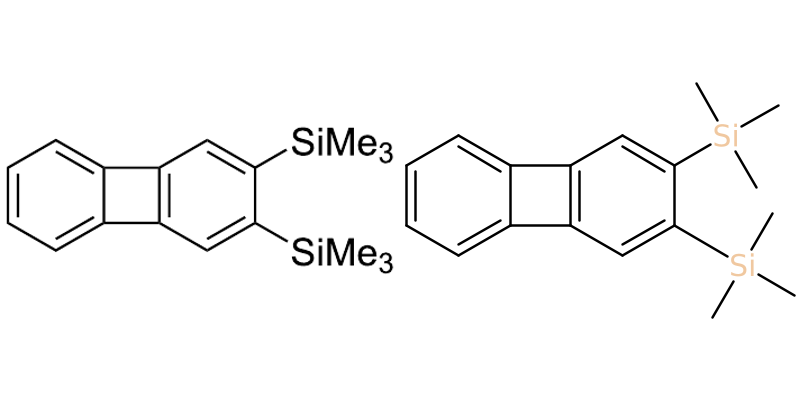

m27780455._11_7.png


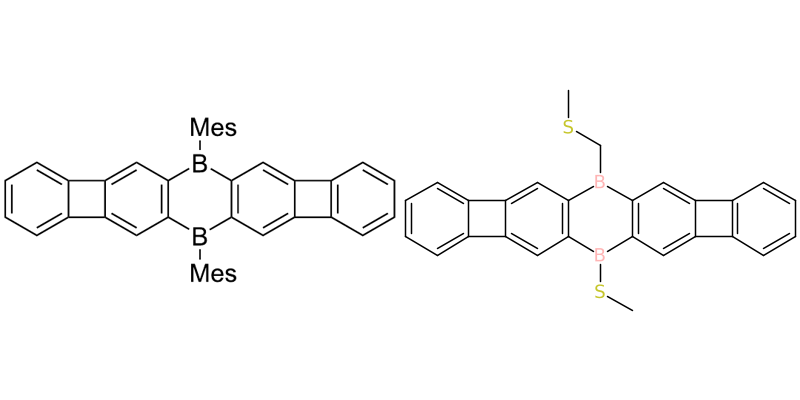

m27780455._11_8.png


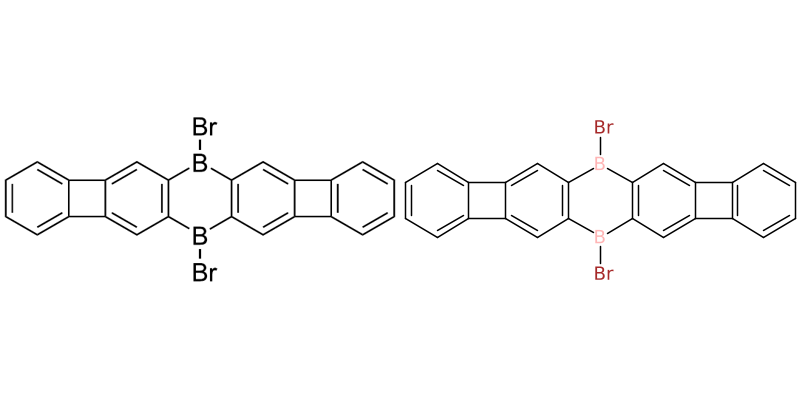

m27780455._12.png
m27780455._12_0.png


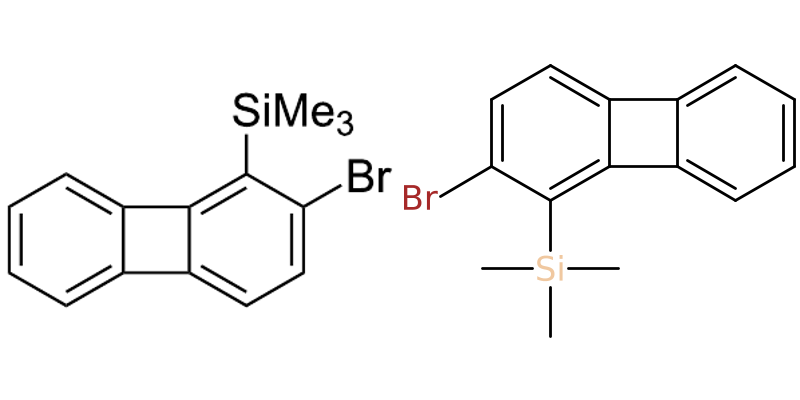

m27780455._12_1.png


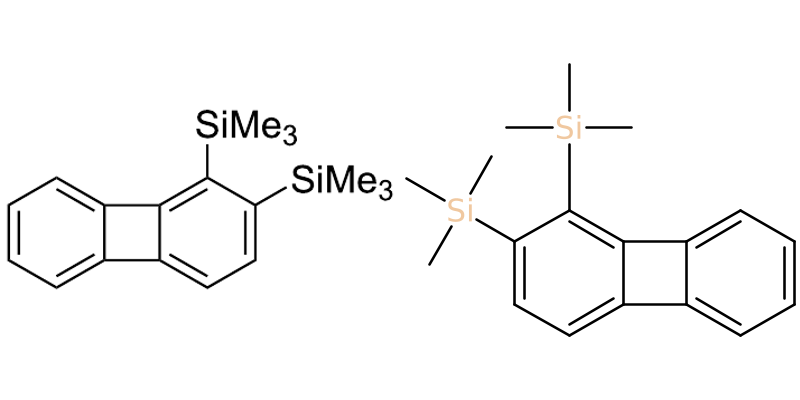

m27780455._12_2.png


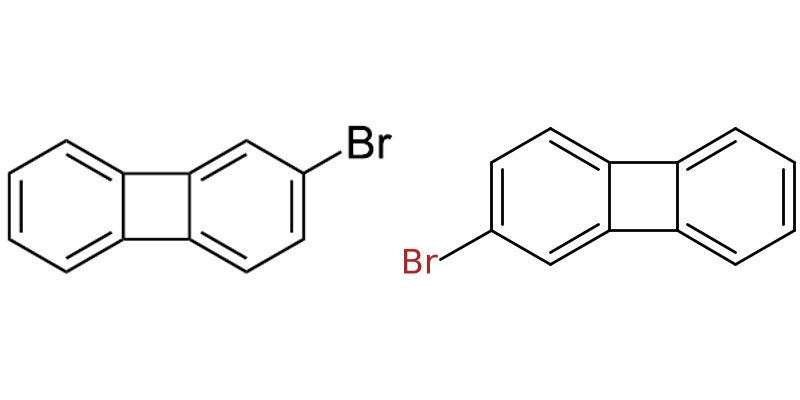

m27780455._12_3.png


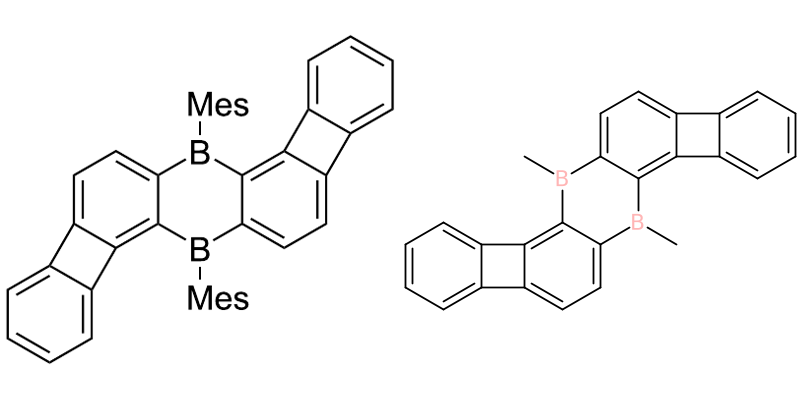

m27780455._12_4.png


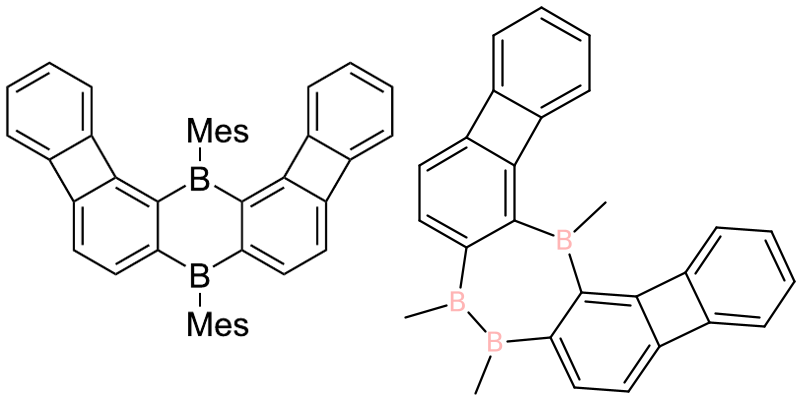

m27780455._12_5.png


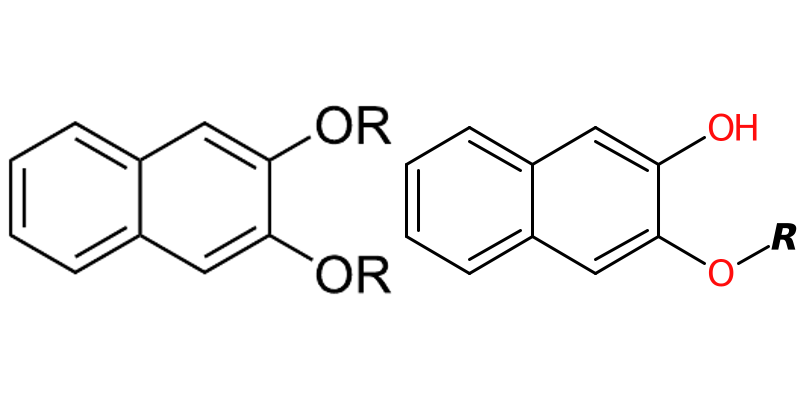

m27780455._12_6.png


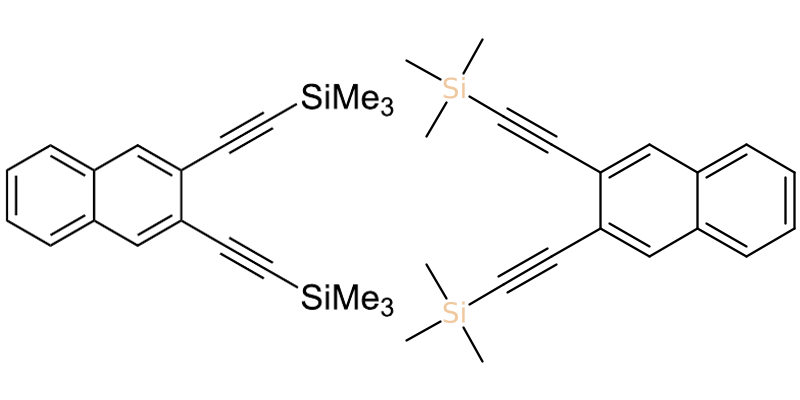

m27780455._12_7.png


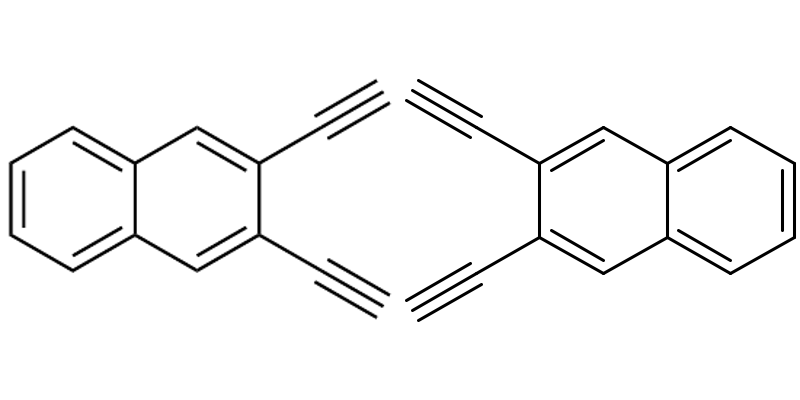

m27780455._12_8.png


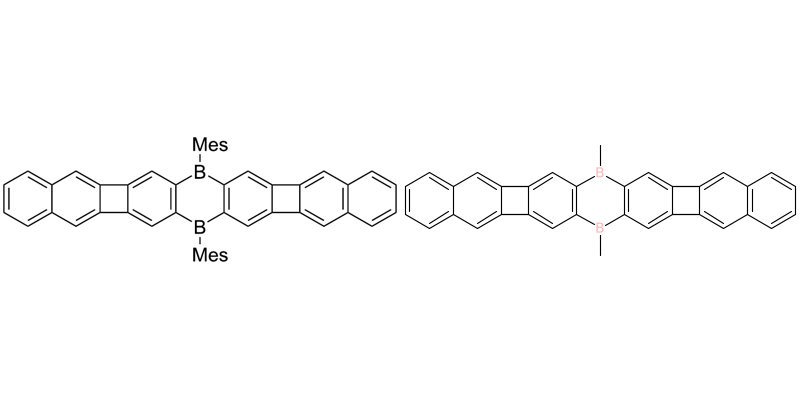

m27780455._12_9.png


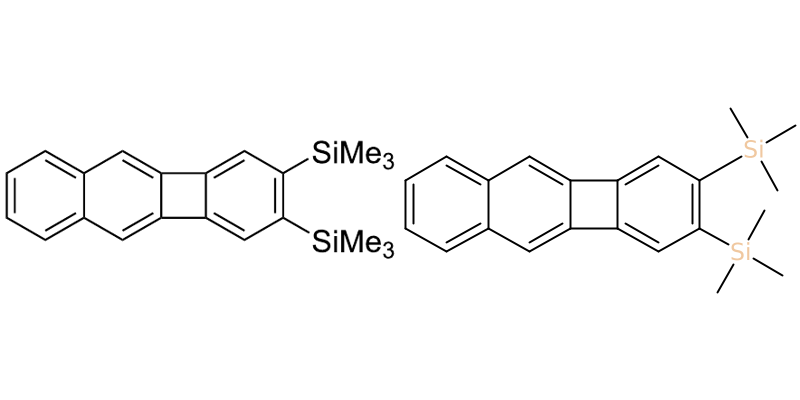

m27780455._13.png
m27780455._13_0.png


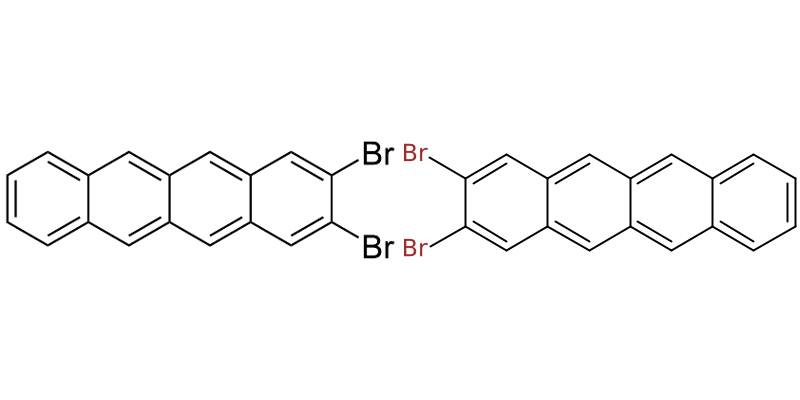

m27780455._13_1.png
m27780455._13_2.png


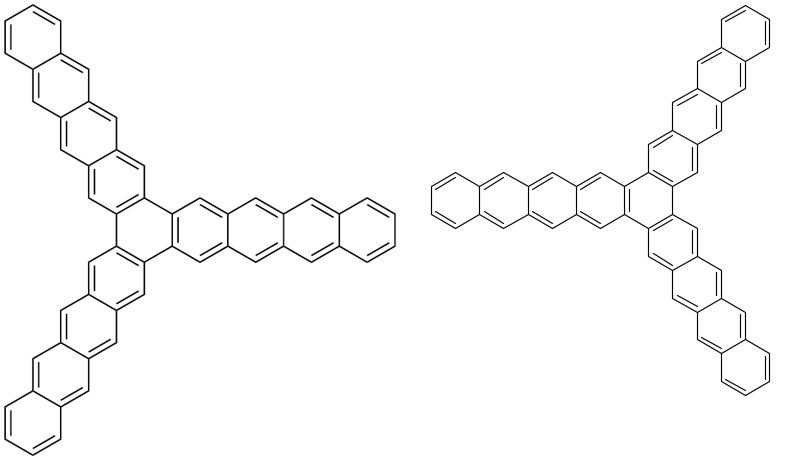

m27780455._14.png
m27780455._14_0.png


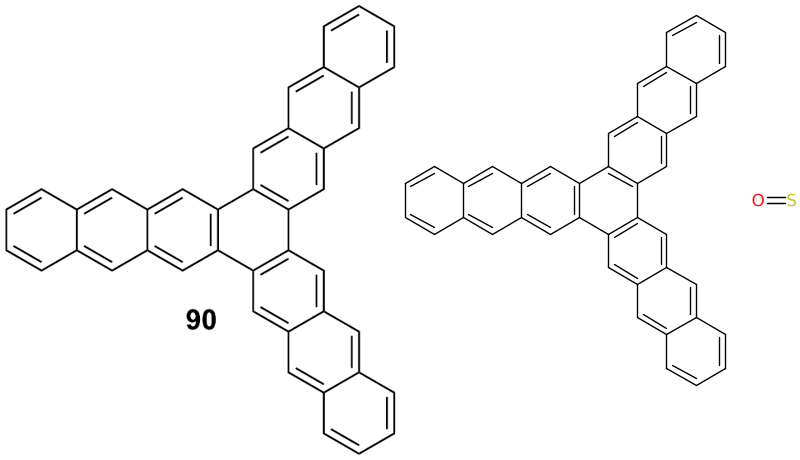

m27780455._14_1.png


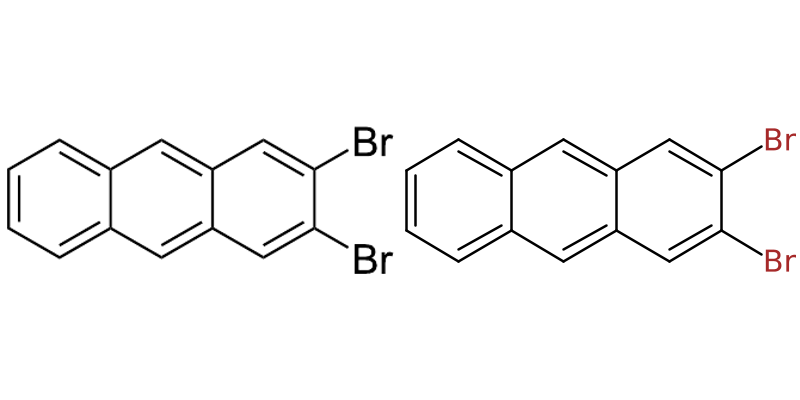

m27780455._14_2.png


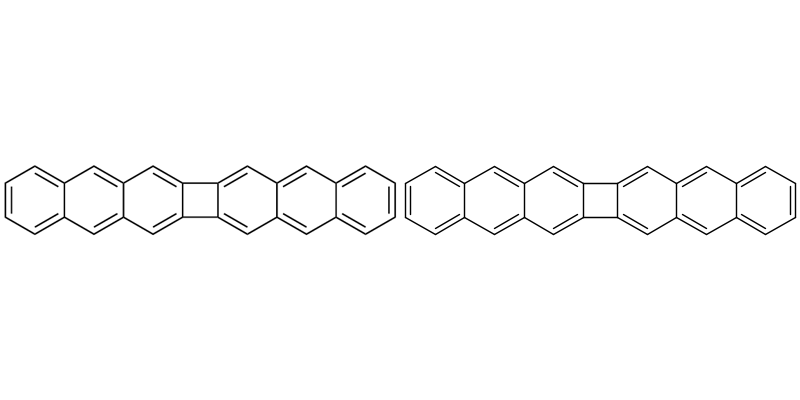

m27780455._14_3.png


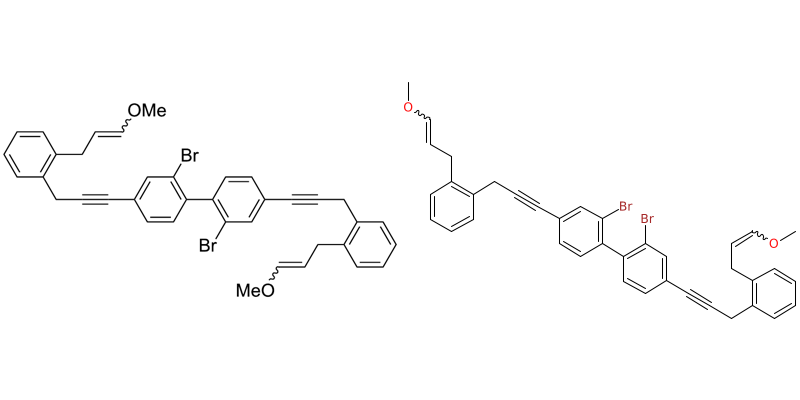

m27780455._14_4.png


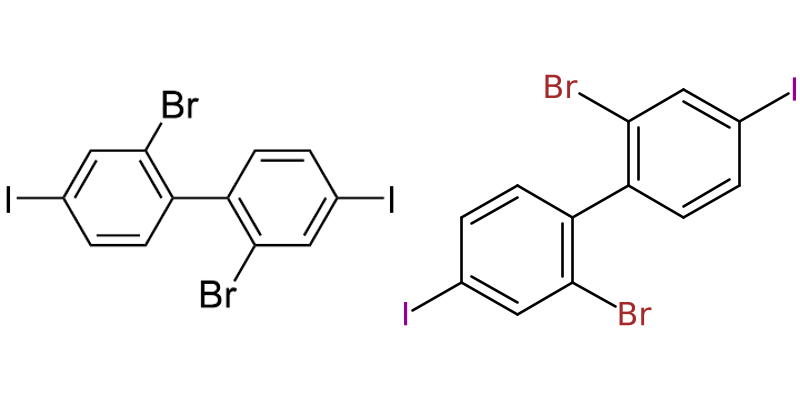

m27780455._14_5.png


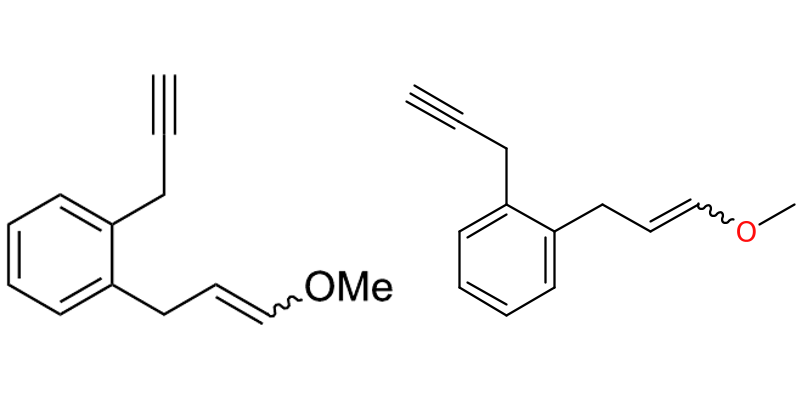

m27780455._14_6.png


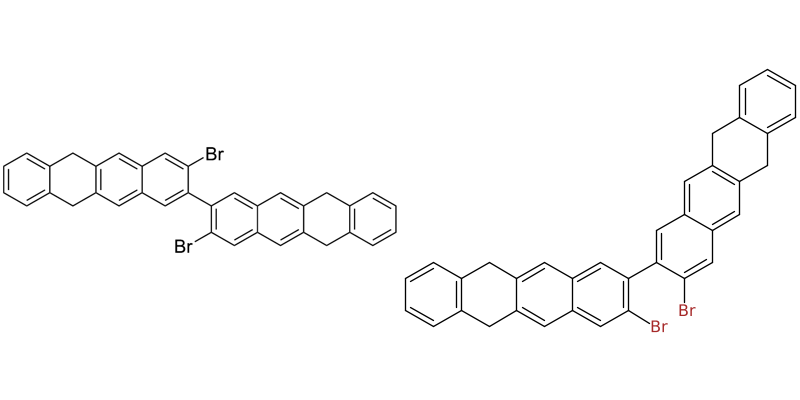

m27780455._14_7.png


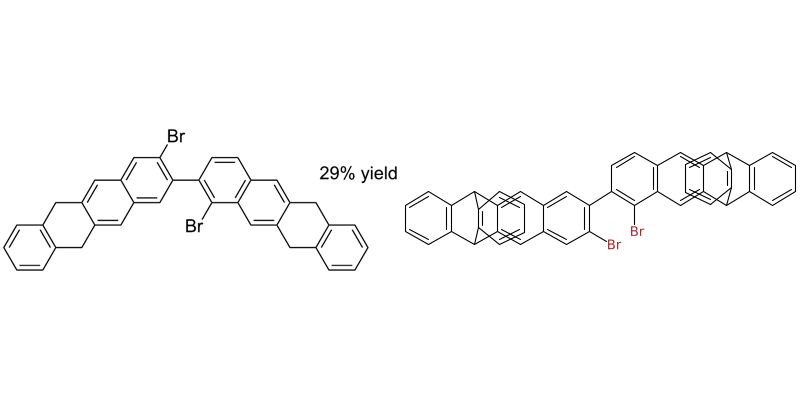

m27780455._14_8.png


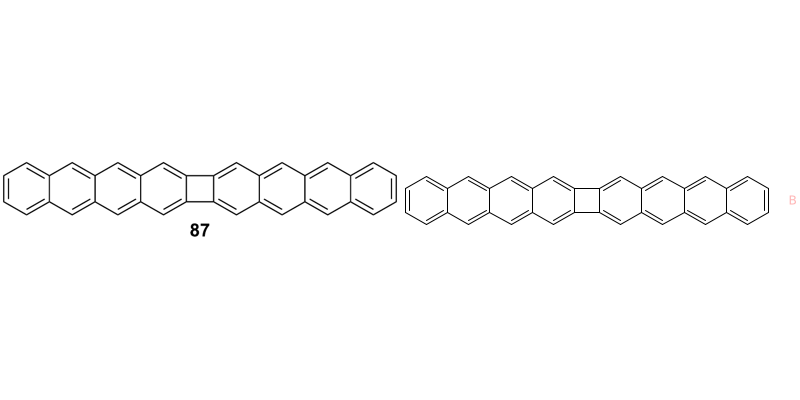

m27780455._2.png
m27780455._2_0.png


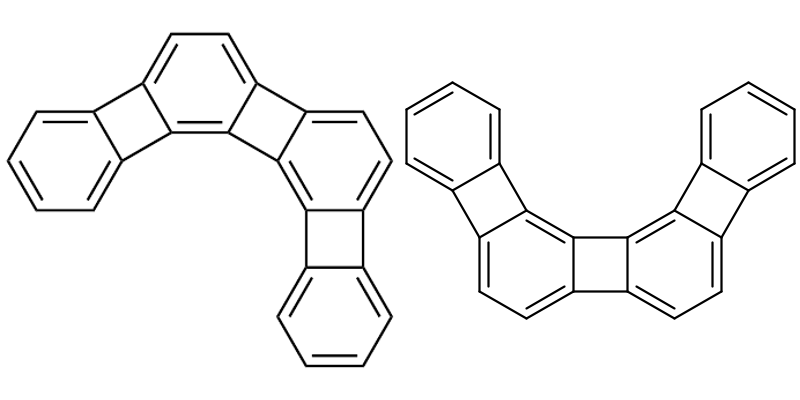

m27780455._2_1.png


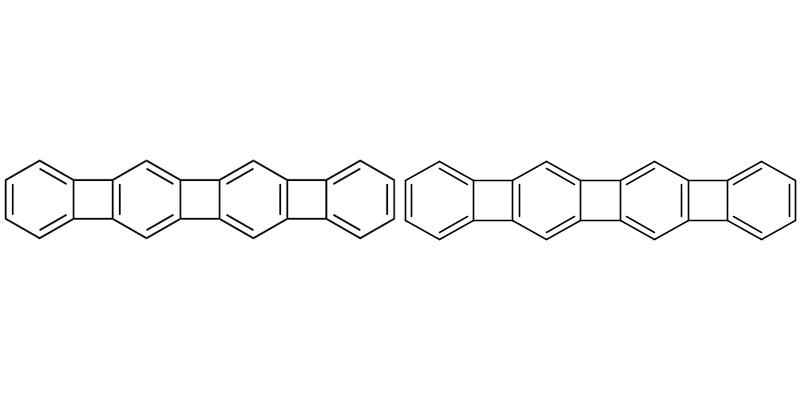

m27780455._2_2.png


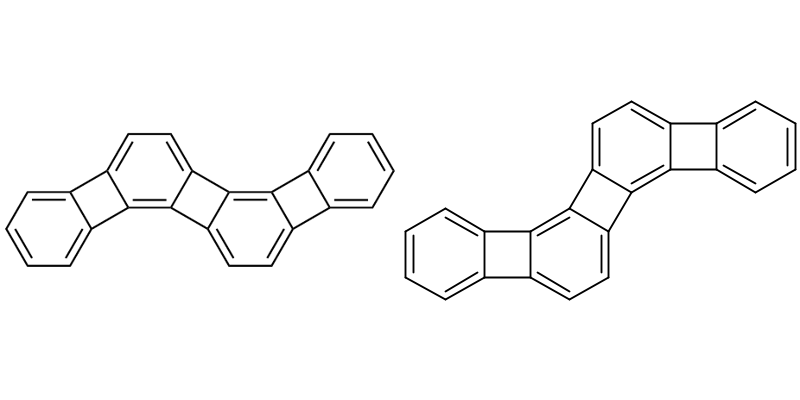

m27780455._2_3.png


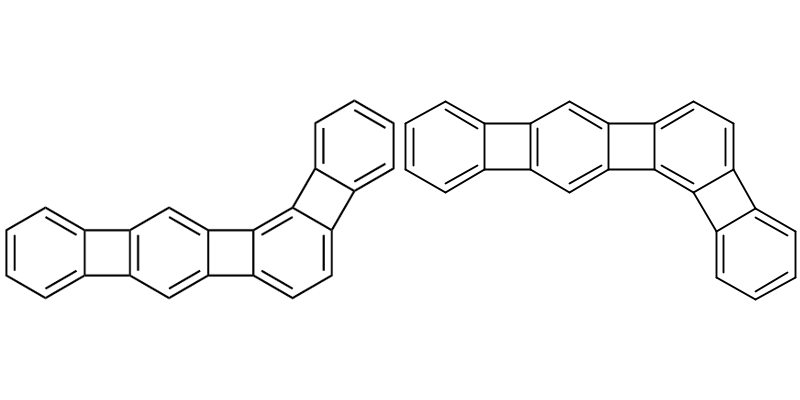

m27780455._2_4.png


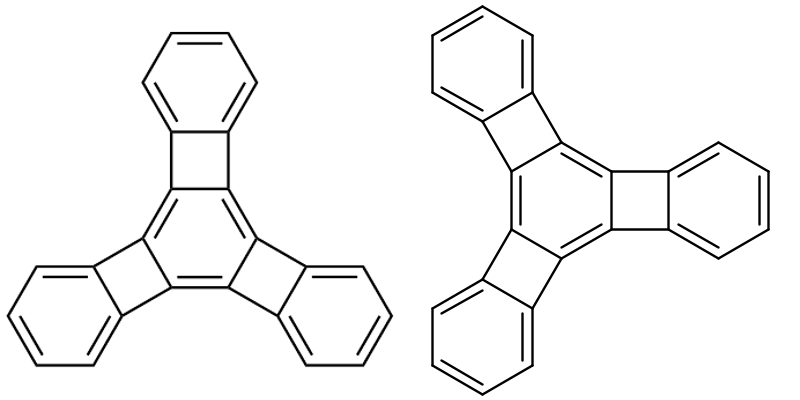

m27780455._2_5.png
Error parsing SMILES


AttributeError: 'str' object has no attribute 'size'

In [5]:
# Create an empty dataframe
df = pd.DataFrame()

# Define the columns you want in the dataframe
col1 = []
col2 = []

for key, value in my_dict.items():
    print(key)
    for i in range(len(value[0])):
        print(os.path.split(value[0][i])[1])
        if (len(value[1][i])) < 300:
            get_display(value[0][i], value[1][i])
            col1.append(os.path.split(value[0][i])[1])
            col2.append(value[1][i])

# Add the columns to the dataframe
df["Segment_title"] = col1
df["SMILES"] = col2

In [9]:
grid = DataGrid(df, base_row_size=30, base_column_size=300, editable=True)

In [10]:
grid

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, base_column_size=300, base_row_size=…

In [ ]:
print(get_citation(get_doi(filename)))

In [ ]:
from depict import getCDKDepiction

getCDKDepiction("CCCCN(CC)C(=O)CCO[Y]")